In [1]:
# Update sklearn to prevent version mismatches
#!pip install sklearn --upgrade

In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
#!pip install joblib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")
from collections import Counter
import os

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("exoplanet_data.csv")
#df = pd.read_csv(os.path.join(".", "Resources", "cumulative.csv"))
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [5]:
# Dimesion
df.shape

(6991, 41)

In [6]:
# Metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6991 entries, 0 to 6990
Data columns (total 41 columns):
koi_disposition      6991 non-null object
koi_fpflag_nt        6991 non-null int64
koi_fpflag_ss        6991 non-null int64
koi_fpflag_co        6991 non-null int64
koi_fpflag_ec        6991 non-null int64
koi_period           6991 non-null float64
koi_period_err1      6991 non-null float64
koi_period_err2      6991 non-null float64
koi_time0bk          6991 non-null float64
koi_time0bk_err1     6991 non-null float64
koi_time0bk_err2     6991 non-null float64
koi_impact           6991 non-null float64
koi_impact_err1      6991 non-null float64
koi_impact_err2      6991 non-null float64
koi_duration         6991 non-null float64
koi_duration_err1    6991 non-null float64
koi_duration_err2    6991 non-null float64
koi_depth            6991 non-null float64
koi_depth_err1       6991 non-null float64
koi_depth_err2       6991 non-null float64
koi_prad             6991 non-null float64

In [7]:
# Verifying if any null values
df.isnull().sum()


koi_disposition      0
koi_fpflag_nt        0
koi_fpflag_ss        0
koi_fpflag_co        0
koi_fpflag_ec        0
koi_period           0
koi_period_err1      0
koi_period_err2      0
koi_time0bk          0
koi_time0bk_err1     0
koi_time0bk_err2     0
koi_impact           0
koi_impact_err1      0
koi_impact_err2      0
koi_duration         0
koi_duration_err1    0
koi_duration_err2    0
koi_depth            0
koi_depth_err1       0
koi_depth_err2       0
koi_prad             0
koi_prad_err1        0
koi_prad_err2        0
koi_teq              0
koi_insol            0
koi_insol_err1       0
koi_insol_err2       0
koi_model_snr        0
koi_tce_plnt_num     0
koi_steff            0
koi_steff_err1       0
koi_steff_err2       0
koi_slogg            0
koi_slogg_err1       0
koi_slogg_err2       0
koi_srad             0
koi_srad_err1        0
koi_srad_err2        0
ra                   0
dec                  0
koi_kepmag           0
dtype: int64

In [8]:
df.isna().sum()

koi_disposition      0
koi_fpflag_nt        0
koi_fpflag_ss        0
koi_fpflag_co        0
koi_fpflag_ec        0
koi_period           0
koi_period_err1      0
koi_period_err2      0
koi_time0bk          0
koi_time0bk_err1     0
koi_time0bk_err2     0
koi_impact           0
koi_impact_err1      0
koi_impact_err2      0
koi_duration         0
koi_duration_err1    0
koi_duration_err2    0
koi_depth            0
koi_depth_err1       0
koi_depth_err2       0
koi_prad             0
koi_prad_err1        0
koi_prad_err2        0
koi_teq              0
koi_insol            0
koi_insol_err1       0
koi_insol_err2       0
koi_model_snr        0
koi_tce_plnt_num     0
koi_steff            0
koi_steff_err1       0
koi_steff_err2       0
koi_slogg            0
koi_slogg_err1       0
koi_slogg_err2       0
koi_srad             0
koi_srad_err1        0
koi_srad_err2        0
ra                   0
dec                  0
koi_kepmag           0
dtype: int64

In [9]:
# Descriptive Statics
df.describe()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6.991000e+03,6.991000e+03,6991.000000,6991.000000,6991.000000,...,6991.000000,6991.000000,6991.000000,6991.00000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000
mean,0.157059,0.244743,0.202975,0.125018,56.191248,1.851122e-03,-1.851122e-03,164.488820,0.009340,-0.009340,...,-161.206980,4.305049,0.121091,-0.14048,1.740749,0.352710,-0.388568,292.082406,43.812143,14.271508
std,0.363882,0.429966,0.402243,0.330763,117.570962,7.184503e-03,7.184503e-03,67.020475,0.021989,0.021989,...,71.448481,0.439238,0.132048,0.08199,5.903415,0.839017,1.907797,4.762908,3.606167,1.350802
min,0.000000,0.000000,0.000000,0.000000,0.259820,1.100000e-08,-1.568000e-01,120.515914,0.000009,-0.569000,...,-1733.000000,0.047000,0.000000,-1.00700,0.109000,0.000000,-103.825000,279.856080,36.577381,6.966000
25%,0.000000,0.000000,0.000000,0.000000,2.620126,5.005000e-06,-2.401000e-04,132.683917,0.001145,-0.010000,...,-197.000000,4.209000,0.044000,-0.19500,0.829000,0.128000,-0.252000,288.704730,40.797760,13.455000
50%,0.000000,0.000000,0.000000,0.000000,8.947426,3.300000e-05,-3.300000e-05,136.739230,0.003990,-0.003990,...,-159.000000,4.436000,0.070000,-0.12700,0.999000,0.248000,-0.111000,292.314760,43.679661,14.534000
75%,0.000000,0.000000,0.000000,0.000000,34.282605,2.401000e-04,-5.005000e-06,169.937005,0.010000,-0.001145,...,-112.000000,4.543000,0.149000,-0.08800,1.357000,0.357000,-0.069000,295.888550,46.693659,15.322000
max,1.000000,1.000000,1.000000,1.000000,1071.232624,1.568000e-01,-1.100000e-08,1472.522306,0.569000,-0.000009,...,0.000000,5.364000,1.472000,0.00000,180.013000,25.956000,0.000000,301.720760,52.336010,19.065000


_Analysis_ : koi_period (The interval between consecutive planetary transits. ) has a maximum value of 1071 whereas the mean is 56.19 and 75percentile is under 34. Similarly, koi_time0bk has a max value of 1472 where as the mean value is 164. Will not remove thise max values from the dataset as these seems like real values.

In [10]:
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# EDA

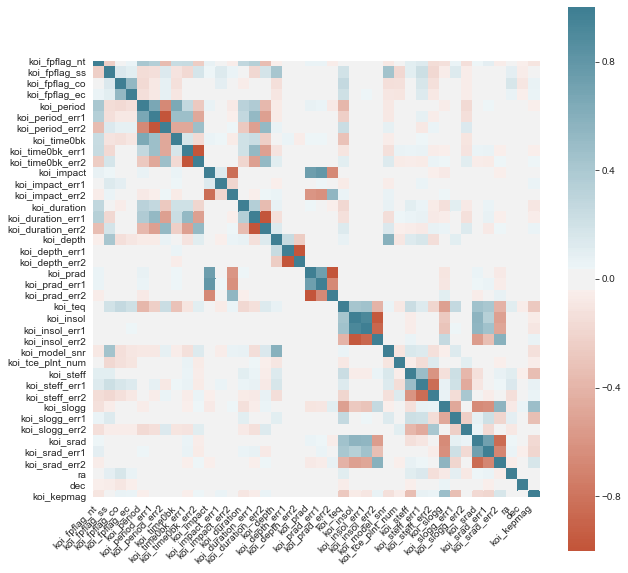

In [11]:
#sns.pairplot(df_selected_features, hue='koi_disposition', palette='coolwarm')
plt.figure(figsize=(10,10))
df_corr = df.corr()
ax = sns.heatmap(
    df_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Select needed features (columns)

### Removing all 'error' value columns from selected features for model building 

In [12]:
# Set features. This will also be used as your x values.
# Using only those columns without errors as features
df_selected_features = df[df.columns.drop(list(df.filter(regex='err')))]
df_selected_features.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_time0bk', 'koi_impact',
       'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_slogg',
       'koi_srad', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

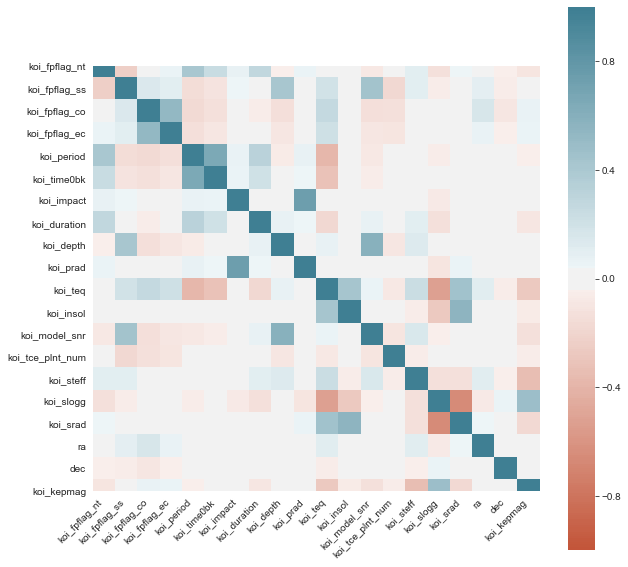

In [13]:
plt.figure(figsize=(10,10))
df_selected_corr = df_selected_features.corr()
ax = sns.heatmap(
    df_selected_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Checking for any imbalance with Target feature

In [14]:
# Checking the frequency of target values
df["koi_disposition"].value_counts()

FALSE POSITIVE    3504
CONFIRMED         1800
CANDIDATE         1687
Name: koi_disposition, dtype: int64

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
koi_disposition,,,,,,,,,,,,,,,,,,,,,
CANDIDATE,24.131026,24.131026,24.131026,24.131026,24.131026,24.131026,24.131026,24.131026,24.131026,24.131026,...,24.131026,24.131026,24.131026,24.131026,24.131026,24.131026,24.131026,24.131026,24.131026,24.131026
CONFIRMED,25.747390,25.747390,25.747390,25.747390,25.747390,25.747390,25.747390,25.747390,25.747390,25.747390,...,25.747390,25.747390,25.747390,25.747390,25.747390,25.747390,25.747390,25.747390,25.747390,25.747390
FALSE POSITIVE,50.121585,50.121585,50.121585,50.121585,50.121585,50.121585,50.121585,50.121585,50.121585,50.121585,...,50.121585,50.121585,50.121585,50.121585,50.121585,50.121585,50.121585,50.121585,50.121585,50.121585


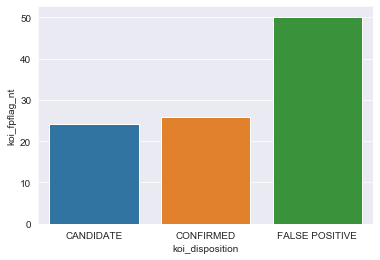

In [15]:
# Doing a frequency analysis on various 'koi_disposition'
total = len(df)
dis_fre = df.groupby('koi_disposition').count()/total * 100
sns.barplot(x= dis_fre.index, y=dis_fre['koi_fpflag_nt'],data=dis_fre,)
dis_fre

Analysis: In the provided dataset, we can see that 50% of the data consists of 'False Positives'a nd this can affect the prediction also as data is imbalanced. Will perform SMOTE to make the dataset balanced.

## Making the dataset balanced by SMOTE

In [16]:
X = df_selected_features.drop('koi_disposition', axis=1)
y = df_selected_features['koi_disposition']

In [17]:
#!pip install imblearn

In [18]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)


Using TensorFlow backend.


In [19]:
X_res, y_res = sm.fit_resample(X, y)

In [20]:
print('Resampled dataset shape %s' % Counter(y_res))
print(X_res.shape)
print(y_res.shape)

Resampled dataset shape Counter({'CONFIRMED': 3504, 'FALSE POSITIVE': 3504, 'CANDIDATE': 3504})
(10512, 20)
(10512,)


# Label Encoding

In [39]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)
for label, original_class in zip(encoded_y, y):
    print('Original Class: ' + str(original_class))
    print('Encoded Label: ' + str(label))
    print('-' * 12)

Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CO

Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original

------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED

Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded

Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CONFIRMED
Encoded Label: 1
------

Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Clas

------------
Original Class: CONFIRMED
Encoded Label: 1
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE

Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE PO

Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label

Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
-

------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: CANDIDATE
Encoded Label: 0
------------
Original Class: FALSE POSITIVE
Encoded Label: 2
------------
Original Class: CANDIDATE
Encod

In [40]:
encoded_y.shape

(6991,)

# Scaling

Scale the data using the MinMaxScaler and perform some feature selection

In [41]:
from sklearn.preprocessing import MinMaxScaler
# Scale your data
scaler = MinMaxScaler()
X_scaler = scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled.shape

(6991, 20)

# Create a Train Test Split

Use `koi_disposition` for the y values

In [42]:
# Importing all libraries
from sklearn.model_selection import train_test_split


In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, encoded_y, random_state=42, stratify=y)

In [45]:
X_train[:10]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.14257009e-02, 8.52058560e-03, 1.16064520e-02, 6.08160552e-01,
        1.71403455e-04, 2.75523537e-04, 8.95368782e-02, 8.21571610e-05,
        1.54532702e-02, 0.00000000e+00, 3.14318096e-01, 7.06789543e-01,
        1.45688812e-02, 4.28760906e-01, 4.97194394e-01, 5.03182081e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.06032621e-02, 8.47075596e-03, 9.69188342e-03, 1.49306584e-02,
        1.19177951e-04, 1.34766948e-05, 5.57804460e-02, 1.44936478e-05,
        7.95307685e-04, 1.42857143e-01, 2.01813374e-01, 7.59074666e-01,
        7.47065101e-03, 6.25276931e-01, 2.87719065e-01, 6.77411356e-01],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00099895e-02, 1.22940939e-02, 7.27139258e-03, 2.58550440e-02,
        3.24839390e-02, 1.08811832e-04, 5.00171527e-02, 9.81497737e-06,
        1.71631817e-01, 0.00000000e+00, 2.48658859e-01, 8.3035

## Create a Support Vector Machine model

In [46]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
classifier = SVC(kernel='linear')


# Train and fit the Model

In [47]:
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

# Validate the model using Test Data

In [48]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8098416936868206
Testing Data Score: 0.812929061784897


# Make Predictions

In [36]:
y_predicted = classifier.predict(X_test_scaled)
print(f"First 10 Predictions: {y_predicted[:10]}")
print(f"First 10 actual labels: {y_test[:10].tolist()}")

First 10 Predictions: ['CONFIRMED' 'FALSE POSITIVE' 'FALSE POSITIVE' 'FALSE POSITIVE'
 'CONFIRMED' 'FALSE POSITIVE' 'CANDIDATE' 'FALSE POSITIVE'
 'FALSE POSITIVE' 'FALSE POSITIVE']
First 10 actual labels: ['CANDIDATE', 'FALSE POSITIVE', 'FALSE POSITIVE', 'FALSE POSITIVE', 'CANDIDATE', 'FALSE POSITIVE', 'CANDIDATE', 'FALSE POSITIVE', 'FALSE POSITIVE', 'FALSE POSITIVE']


In [37]:
pd.DataFrame({"Prediction": y_predicted, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,CONFIRMED,CANDIDATE
1,FALSE POSITIVE,FALSE POSITIVE
2,FALSE POSITIVE,FALSE POSITIVE
3,FALSE POSITIVE,FALSE POSITIVE
4,CONFIRMED,CANDIDATE
...,...,...
1743,CONFIRMED,CONFIRMED
1744,FALSE POSITIVE,FALSE POSITIVE
1745,FALSE POSITIVE,FALSE POSITIVE
1746,FALSE POSITIVE,FALSE POSITIVE


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [ ]:
# Create the GridSearchCV model

In [ ]:
# Train the model with GridSearch

In [ ]:
print(grid2.best_params_)
print(grid2.best_score_)

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)